# RNN with GRUs

Implemented as in *Shape and Time Distortion Loss for Training Deep Time Series Forecasting Models (2019)* https://arxiv.org/abs/1909.09020

In [1]:
%config IPCompleter.greedy=True

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random

import torch
from torch.utils.data import DataLoader

from evaluation import Result, Evaluation
from datasets import get_dataset
from models.gru import run_gru_model

# Dataset: Traffic

In [4]:
archive = 'mvdata'
ds_name = 'traffic'

in_size = 24
out_size = 24
test_size = 500

batch_size = 32
epochs = 25

train, test = get_dataset('mvdata', 'traffic', in_size, out_size, test_size)
train_dl = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)
test_dl = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)

#### Run model

In [ ]:
# Run LSTM model
x_test, y_test, yhat_test = run_gru_model(train_dl, test_dl, out_size=out_size, epochs=epochs)

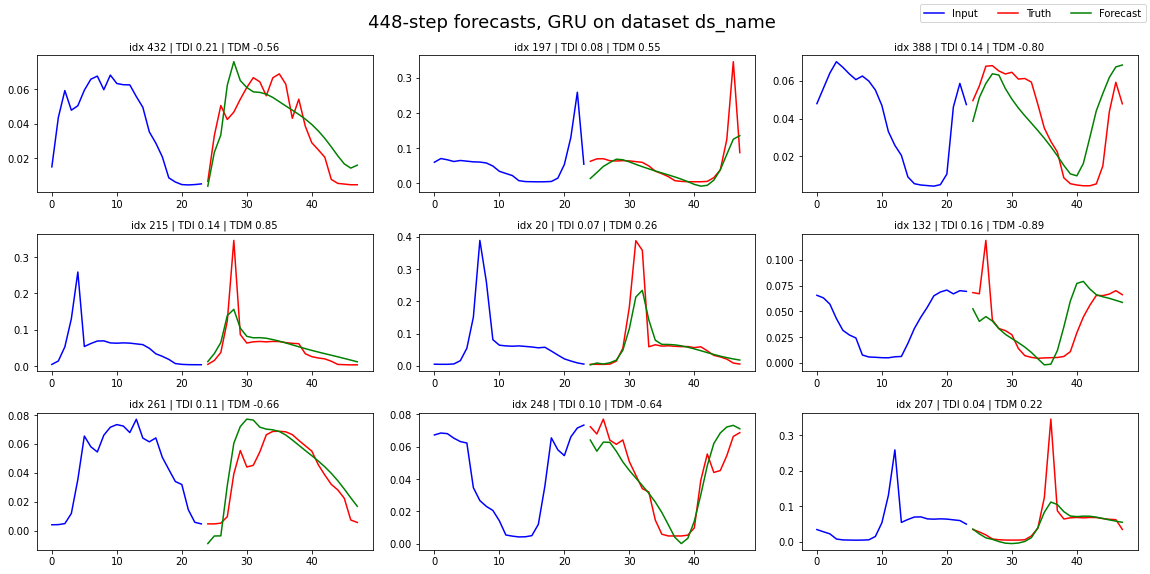

In [5]:
result = Result(x_test, y_test, yhat_test, 'ds_name', "GRU")

result.plot_forecasts()